# Trying to plot out training data for a potential split

In [17]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as numpy 
import seaborn as sns
import pandas as pd
import random

# We're gonna read the data in just to see what it looks like

In [18]:
df = pd.read_csv('data/train.csv')
df.head()

,TransactionID,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
0,1,C,5812,408.0,185.0,mastercard,224.0,debit,NotFound,NotFound,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0
1,2,W,12577,268.0,150.0,visa,166.0,debit,123.0,87.0,...,94.0,0.0,0.0,85.0,0.0,104.0,0.0,457.0,120.0,0
2,3,H,12581,453.0,150.0,visa,226.0,debit,272.0,87.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0
3,4,W,8139,327.0,150.0,discover,194.0,credit,204.0,87.0,...,2.0,0.0,0.0,2.0,0.0,3.0,0.0,18.0,6.0,0
4,5,W,16132,111.0,150.0,visa,226.0,debit,220.0,87.0,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,1.0,0


In [19]:
#dropping the first the TransactionID column, inplace=1 means the chanves should reflect onto datafram
df.drop('TransactionID', axis=1, inplace=True)

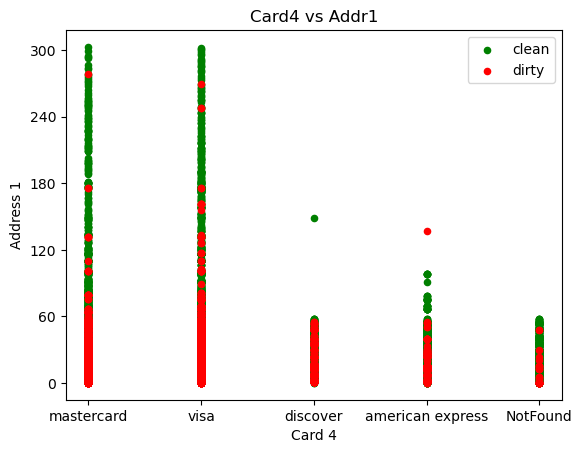

In [20]:
# Assuming df is your DataFrame
# We should play with diffent x and y variables to try and find a correlation
fig, ax = plt.subplots()

# Plot clean data
df[df['isFraud'] == 0].plot.scatter(x='card4', y='addr1', color='green', label='clean', ax=ax)

# Plot dirty data
df[df['isFraud'] == 1].plot.scatter(x='card4', y='addr1', color='red', label='dirty', ax=ax)

ax.set_xlabel('Card 4')
ax.set_ylabel('Address 1')
ax.set_title('Card4 vs Addr1')

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))  # Set maximum number of ticks
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))  # Format ticks as integers

plt.show()



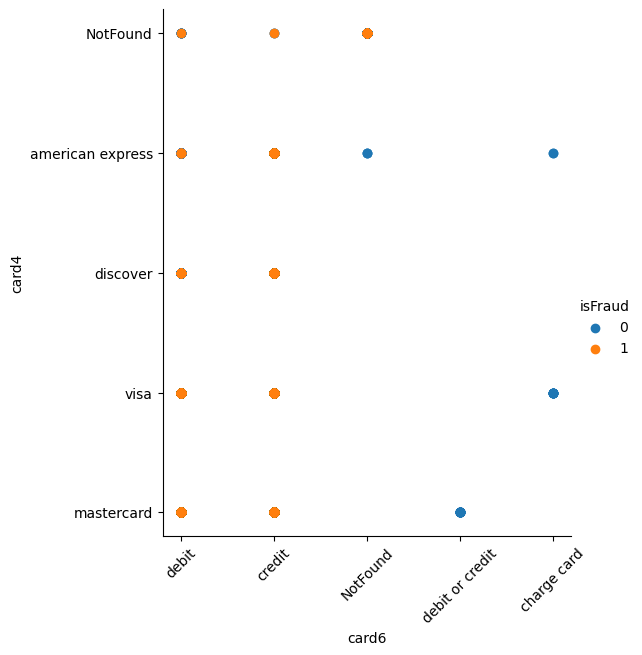

In [23]:
# Assuming df is your DataFrame
g = sns.FacetGrid(df, hue="isFraud", height=6)  # Adjust height as needed
g.map(plt.scatter, "card6", "card4").add_legend()

# Rotate x-axis labels if necessary
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Adjust rotation angle as needed

plt.show()

   